<a href="https://colab.research.google.com/github/wendy-ha/net_promoter_score_analysis/blob/main/Net_Promoter_System_Analysis_for_Imaginary_Childcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME


* **Project:** An analysis on customer loyalty and satisfaction through Net Promoter Score (NPS) survey of Imaginary Childcare.

* **Disclaimer:** Due to the lack of information on the assigned organization and the data acquisition approach, the author actively generalised Imaginary as a fiction childcare center and made several assumptions regarding the business and the data in order to move forward with the analysis process. **Please use the insights derived from this notebook for reference purposes only.**

* **Contact:** Wendy Ha (wendyha.sut@gmail.com - 0402384850). Check more of my personal projects at: https://wendy-ha-portfolio.netlify.app/

#Introduction

##Net promoter system

Net Promoter Score (NPS) is a simple method of measuring the overall likelihood of a customer to recommend a product, service or company to a friend or family's member. 

In this analysis, the Net Promoter Score (NPS), on a scale from 0 to 10, evaluates the likelihood that parents would recommend **Imaginary Childcare services** at centres around Australia to their colleagues or friends.

* Customers who score 9 and 10 are classified as Promoters
* Customers who score 7 and 8 are classified as Neutral/Passive
* Customers who score 0 and 6 are classified as Detractors 

To calculate NPS: **NPS = (Promoters - Detractors)/Total ratings * 100** 

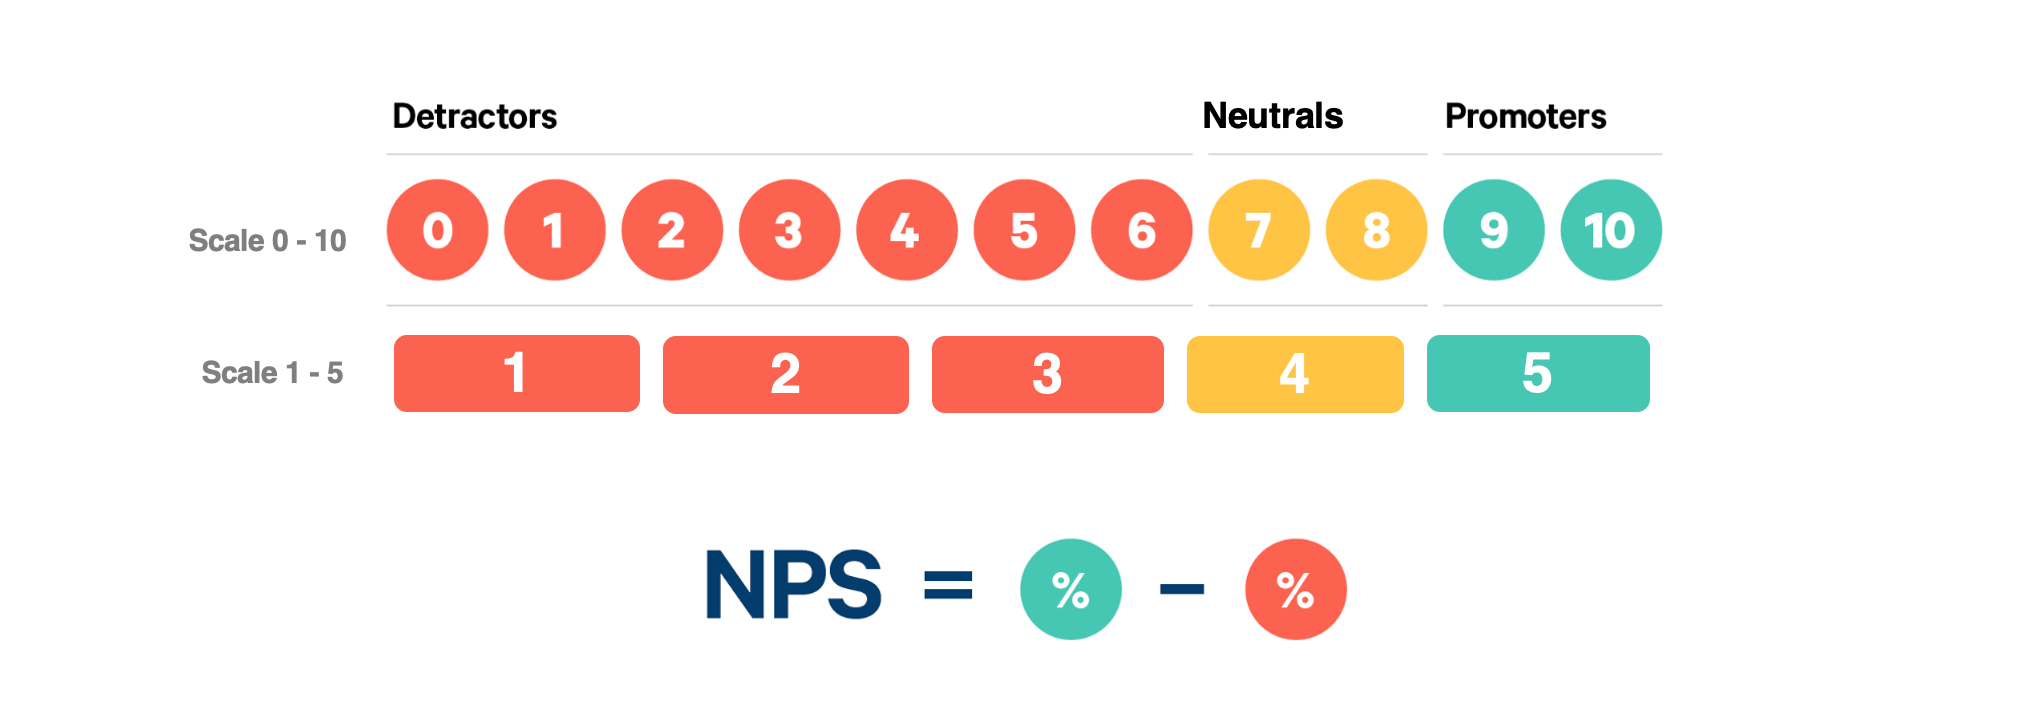

##Problem statements

The purpose of this notebook is to assist Imaginary Childcare's managers in assessing the factors impacting the level of parents and children's satisfaction after using their services, particularly in the post COVID-19 period. Imaginary Childcare is anticipated to make reasonable modifications to its business strategy based on the analysis's findings in order to increase its Net Promoter Score (NPS) and customer recommendation.

The intended objective can be achieved by responding to the following questions:

**PART A: Geographic Analysis**
* Q1: Among eight states and territories of Australia *(New South Wales, Queensland, Victoria, Western Australia, South Australia, Tasmania, Northern Territory, Australian Capital Territory)*, which one had the highest number of respondents to the Imaginary Childcare NPS survey? 
* Q2: How children and parents' satisfaction vary by states and cities? 

**PART B: Behavioral Analysis**
* Q3: Has the satisfaction of parents and children at Imaginary Childcare centres improved over the period of 08 months, from 10/2021 to 05/2022?
* Q4: Which category has the highest and lowest NPS score among the following eight: *Ambience And Atmosphere, Curriculum And Activities, Visit Booking Process, Environment And Facilities, Information And Experience, Questions, Nutritious Meals, and Value For Money*?

#1.0 Data Acquisition

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import os
import re
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [3]:
#Install newest version of matplotlib for visualization
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 12.9 MB/s 
     |████████████████████████████████| 965 kB 8.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


##1.1 Loading and reading Imaginary Childcare dataset

In [3]:
#Load data from local computer
from google.colab import files
uploaded = files.upload()

Saving Imaginary_Childcare.xlsx to Imaginary_Childcare.xlsx


In [4]:
#Read data by pandas read_excel() function
df_childcare = pd.read_excel('Imaginary_Childcare.xlsx')

##1.2 Review both head and tail of the dataframe

In [5]:
#Review both head() and tail() of the uploaded Imaginary dataframe to ensure it is equivalent 
#with the data in the raw Imaginary_Childcare.xlsx

#Check head
df_childcare.head()

Area       City  NPS NPS Label Ambience And Atmosphere  \
0     7     Sydney   10  Promoter       5. Strongly Agree   
1     4  Melbourne   10  Promoter       5. Strongly Agree   
2    13   Brisbane   10  Promoter       5. Strongly Agree   
3    16      Perth    9  Promoter       5. Strongly Agree   
4    20   Adelaide   10  Promoter       5. Strongly Agree   

  Curriculum and Activities Visit Booking Process Environment And Facilities  \
0         5. Strongly Agree     5. Strongly Agree          5. Strongly Agree   
1         5. Strongly Agree     5. Strongly Agree          5. Strongly Agree   
2         5. Strongly Agree     5. Strongly Agree          5. Strongly Agree   
3         5. Strongly Agree     5. Strongly Agree          5. Strongly Agree   
4         5. Strongly Agree     5. Strongly Agree          5. Strongly Agree   

  Information and Experience          Questions  ... Survey Sent Date [GMT]  \
0          5. Strongly Agree  5. Strongly Agree  ...             2022-05-13   
1          5. Strongly Agree  5. Strongly Agree  ...             2022-05-11   
2          5. Strongly Agree  5. Strongly Agree  ...             2022-04-29   
3          5. Strongly Agree  5. Strongly Agree  ...             2022-05-13   
4          5. Strongly Agree  5. Strongly Agree  ...             2022-05-13   

  Start Date                            NPS Feedback Categories  \
0 2022-05-11  "Campus Directors & Educators","Curriculum & P...   
1 2022-05-06                                    "Communication"   
2 2022-04-27  "Campus Directors & Educators","Cleanliness & ...   
3 2022-05-10  "App & Child Updates","Campus Directors & Educ...   
4 2022-05-11     "Campus Directors & Educators","Communication"   

  Improvement Feedback Categories Response Month (YYYY-MM)  \
0                             NaN                  2022-05   
1                             NaN                  2022-05   
2                             NaN                  2022-05   
3                             NaN                  2022-05   
4                             NaN                  2022-05   

  Response Year (YYYY) Response Quarter (YYYY-Q#) Workflow Status  \
0                 2022                    2022-Q2          Closed   
1                 2022                    2022-Q2          Closed   
2                 2022                    2022-Q2          Closed   
3                 2022                    2022-Q2     In Progress   
4                 2022                    2022-Q2         Pending   

       Last Modified Date  Division  
0 2022-05-25 16:47:45.627      Blue  
1 2022-05-25 17:41:09.508       Red  
2 2022-05-24 10:40:36.112     Green  
3 2022-05-24 13:04:49.949      Blue  
4 2022-05-23 20:48:56.323    Purple  

[5 rows x 24 columns]

In [6]:
#Check tail
df_childcare.tail()

Area          City  NPS  NPS Label Ambience And Atmosphere  \
2030    11  Mount Barker    0  Detractor    1. Strongly Disagree   
2031    12        Drouin    8    Neutral       5. Strongly Agree   
2032     1      Ballarat   10   Promoter       5. Strongly Agree   
2033    21        Leeton   10   Promoter       5. Strongly Agree   
2034     5      Blaxland   10   Promoter       5. Strongly Agree   

          Curriculum and Activities          Visit Booking Process  \
2030  3. Neither Agree nor Disagree           1. Strongly Disagree   
2031                       4. Agree  3. Neither Agree nor Disagree   
2032                       4. Agree              5. Strongly Agree   
2033              5. Strongly Agree              5. Strongly Agree   
2034  3. Neither Agree nor Disagree              5. Strongly Agree   

     Environment And Facilities Information and Experience  \
2030                   4. Agree       1. Strongly Disagree   
2031                   4. Agree          5. Strongly Agree   
2032          5. Strongly Agree          5. Strongly Agree   
2033          5. Strongly Agree          5. Strongly Agree   
2034          5. Strongly Agree          5. Strongly Agree   

                 Questions  ... Survey Sent Date [GMT] Start Date  \
2030  1. Strongly Disagree  ...             2021-10-08 2021-10-04   
2031     5. Strongly Agree  ...             2021-10-08 2021-09-30   
2032     5. Strongly Agree  ...             2021-10-08 2021-10-04   
2033     5. Strongly Agree  ...             2021-10-08 2021-10-01   
2034     5. Strongly Agree  ...             2021-10-08 2021-10-01   

                                NPS Feedback Categories  \
2030  "App & Child Updates","Campus Directors & Educ...   
2031  "Cleanliness & Hygiene","Environment & Facilit...   
2032  "Campus Directors & Educators","Environment & ...   
2033  "Campus Directors & Educators","Environment & ...   
2034                     "Campus Directors & Educators"   

         Improvement Feedback Categories Response Month (YYYY-MM)  \
2030          "Environment & Facilities"                  2021-10   
2031  "Communication","Food & Nutrition"                  2021-10   
2032                                 NaN                  2021-10   
2033                                 NaN                  2021-10   
2034                                 NaN                  2021-10   

     Response Year (YYYY) Response Quarter (YYYY-Q#) Workflow Status  \
2030                 2021                    2021-Q4     In Progress   
2031                 2021                    2021-Q4          Closed   
2032                 2021                    2021-Q4          Closed   
2033                 2021                    2021-Q4          Closed   
2034                 2021                    2021-Q4          Closed   

          Last Modified Date  Division  
2030 2021-11-17 08:54:13.647      Blue  
2031 2021-10-13 11:39:05.682      Blue  
2032 2021-10-11 08:22:08.447    Yellow  
2033 2021-10-13 11:21:38.720    Orange  
2034 2021-10-13 11:38:21.135       Red  

[5 rows x 24 columns]

The dataset has been successfully uploaded from local repository to Google Colab environment.

#2.0 Data Preparation

##2.1 Preview Granularity/Variables description

In [7]:
df_childcare.columns

Index(['Area', 'City', 'NPS', 'NPS Label', 'Ambience And Atmosphere',
       'Curriculum and Activities', 'Visit Booking Process',
       'Environment And Facilities', 'Information and Experience', 'Questions',
       'Nutritious Meals', 'Value For Money', 'Survey Response Date [GMT]',
       'Responded Week Starting on [GMT]', 'Survey Sent Date [GMT]',
       'Start Date', 'NPS Feedback Categories',
       'Improvement Feedback Categories', 'Response Month (YYYY-MM)',
       'Response Year (YYYY)', 'Response Quarter (YYYY-Q#)', 'Workflow Status',
       'Last Modified Date', 'Division'],
      dtype='object')

**Findings:**
* Column names contain **white spaces** and **uppercase letters**, which can make data 
manipulation more complex later on. I decided to rename columns in this stage.
* There is **no "id" column** in the dataset.  In order to facilitate data processing in the next parts, I plan to insert an "id" column at the beginning of the column list. The id will increase from 1 to the length of the dataframe.

##2.2 Formatting columns' name

In [8]:
#Remove white space between column's name and convert uppercase to lowercase
df_childcare.columns = [re.sub('[.\s]+', '_', c.lower()) for c in df_childcare.columns] 

In [9]:
#Rename some columns to make their meaning clearer
df_childcare.rename(columns={'survey_response_date_[gmt]':'survey_response_date', 
                              'responded_week_starting_on_[gmt]':'responded_week_starting_on',
                              "survey_sent_date_[gmt]" : 'survey_sent_date',
                             "start_date" : 'surveyed_week_starting_on',                             
                              "response_month_(yyyy-mm)":'response_month_and_year',
                              "response_year_(yyyy)":'response_year',
                              "response_quarter_(yyyy-q#)":'response_quarter_and_year'
                             }, inplace=True)

In [10]:
#Add "id" column at the beginning of the column list. 
#The id will increase from 1 to the len(df_childcare).
df_childcare.insert(0, 'id', range(1, 1 + len(df_childcare)))

In [11]:
df_childcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               2035 non-null   int64         
 1   area                             2035 non-null   int64         
 2   city                             2035 non-null   object        
 3   nps                              2035 non-null   int64         
 4   nps_label                        2035 non-null   object        
 5   ambience_and_atmosphere          1953 non-null   object        
 6   curriculum_and_activities        1969 non-null   object        
 7   visit_booking_process            1979 non-null   object        
 8   environment_and_facilities       1957 non-null   object        
 9   information_and_experience       1972 non-null   object        
 10  questions                        1952 non-null   object     

In [12]:
#Check number of unique values in each columns
df_childcare.nunique()

id                                 2035
area                                 25
city                                333
nps                                  11
nps_label                             3
ambience_and_atmosphere               5
curriculum_and_activities             5
visit_booking_process                 5
environment_and_facilities            5
information_and_experience            5
questions                             5
nutritious_meals                      5
value_for_money                       5
survey_response_date                205
responded_week_starting_on           34
survey_sent_date                     52
surveyed_week_starting_on           172
nps_feedback_categories             248
improvement_feedback_categories     118
response_month_and_year               8
response_year                         2
response_quarter_and_year             3
workflow_status                       4
last_modified_date                 1735
division                              7


In [13]:
#Check (month) duration of survey
df_childcare.response_month_and_year.value_counts()

2022-03    359
2022-02    343
2022-04    278
2021-11    265
2022-01    211
2021-12    202
2021-10    197
2022-05    180
Name: response_month_and_year, dtype: int64

In [14]:
#Check (quater) duration of survey
df_childcare.response_quarter_and_year.value_counts()

2022-Q1    913
2021-Q4    664
2022-Q2    458
Name: response_quarter_and_year, dtype: int64

**Findings:**
- The survey was conducted from October 2021 to May 2022, spanning eight months (It corresponds to Q4 2021 and Q1, Q2 2022.).
- 2,035 individuals responded to the Imaginary Childcare NPS survey. These individuals come from 25 local government areas and 333 cities located throughout Australia.
- "*Ambience and Atmosphere, Curriculum and Activities, Visit Booking Process, Environment and Facilities, Information and Experience, Questions, Nutritious Meals, and Value For Money*" are the 08 primary survey areas (using NPS scores on scale 1 to 5).

##2.3 Concatenating new dataframe

The Imaginary's NPS survey, as previously discovered, spanned too broad, with 25 local government areas and 333 cities across Australia, making spatial analysis difficult. Therefore, it is necessary to scale down areas by transforming cities into states to which they belong.

In the following steps, I will merge an AU city database (https://www.kaggle.com/datasets/maryamalizadeh/worldcities-australia) covering 1,035 prominent cities in Australia with associated **latitude, longitude, and state** of each city into the Imaginary dataset in order to generate a new dataframe for geographic analysis.


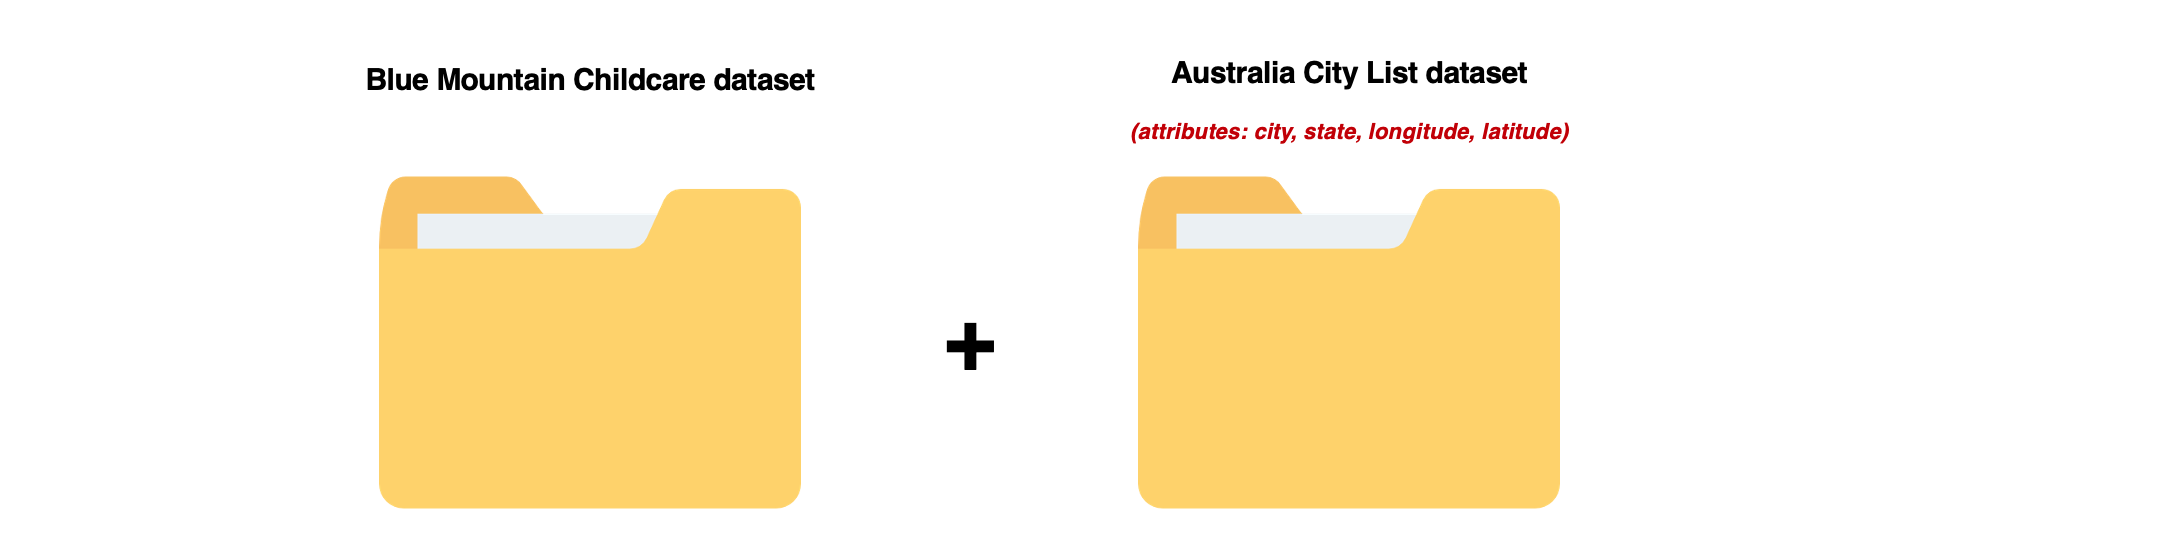

In [15]:
#Load Au cities dataset from local computer
from google.colab import files
uploaded = files.upload()

Saving au_cities_list.csv to au_cities_list.csv


In [16]:
#Read csv file au_cities_list.csv uploaded
au_cities = pd.read_csv('au_cities_list.csv')
au_cities

city  latitude  longitude              state
0        Sydney  -33.8650   151.2094    New South Wales
1     Melbourne  -37.8136   144.9631           Victoria
2      Brisbane  -27.4678   153.0281         Queensland
3         Perth  -31.9522   115.8589  Western Australia
4      Adelaide  -34.9289   138.6011    South Australia
...         ...       ...        ...                ...
1030  The Palms  -26.1902   152.5861         Queensland
1031  Millfield  -32.8886   151.2614    New South Wales
1032   Dunbogan  -31.6500   152.8167    New South Wales
1033    Tomakin  -35.8228   150.1894    New South Wales
1034     Currie  -39.9311   143.8510           Tasmania

[1035 rows x 4 columns]

In [17]:
#Merge au_cities dataset with df_childcare dataset by left join 2 data frames on city column
new_df = df_childcare.merge(au_cities.drop_duplicates(subset=['city']), how='left')
new_df

id  area          city  nps  nps_label ambience_and_atmosphere  \
0        1     7        Sydney   10   Promoter       5. Strongly Agree   
1        2     4     Melbourne   10   Promoter       5. Strongly Agree   
2        3    13      Brisbane   10   Promoter       5. Strongly Agree   
3        4    16         Perth    9   Promoter       5. Strongly Agree   
4        5    20      Adelaide   10   Promoter       5. Strongly Agree   
...    ...   ...           ...  ...        ...                     ...   
2030  2031    11  Mount Barker    0  Detractor    1. Strongly Disagree   
2031  2032    12        Drouin    8    Neutral       5. Strongly Agree   
2032  2033     1      Ballarat   10   Promoter       5. Strongly Agree   
2033  2034    21        Leeton   10   Promoter       5. Strongly Agree   
2034  2035     5      Blaxland   10   Promoter       5. Strongly Agree   

          curriculum_and_activities          visit_booking_process  \
0                 5. Strongly Agree              5. Strongly Agree   
1                 5. Strongly Agree              5. Strongly Agree   
2                 5. Strongly Agree              5. Strongly Agree   
3                 5. Strongly Agree              5. Strongly Agree   
4                 5. Strongly Agree              5. Strongly Agree   
...                             ...                            ...   
2030  3. Neither Agree nor Disagree           1. Strongly Disagree   
2031                       4. Agree  3. Neither Agree nor Disagree   
2032                       4. Agree              5. Strongly Agree   
2033              5. Strongly Agree              5. Strongly Agree   
2034  3. Neither Agree nor Disagree              5. Strongly Agree   

     environment_and_facilities information_and_experience  ...  \
0             5. Strongly Agree          5. Strongly Agree  ...   
1             5. Strongly Agree          5. Strongly Agree  ...   
2             5. Strongly Agree          5. Strongly Agree  ...   
3             5. Strongly Agree          5. Strongly Agree  ...   
4             5. Strongly Agree          5. Strongly Agree  ...   
...                         ...                        ...  ...   
2030                   4. Agree       1. Strongly Disagree  ...   
2031                   4. Agree          5. Strongly Agree  ...   
2032          5. Strongly Agree          5. Strongly Agree  ...   
2033          5. Strongly Agree          5. Strongly Agree  ...   
2034          5. Strongly Agree          5. Strongly Agree  ...   

         improvement_feedback_categories response_month_and_year  \
0                                    NaN                 2022-05   
1                                    NaN                 2022-05   
2                                    NaN                 2022-05   
3                                    NaN                 2022-05   
4                                    NaN                 2022-05   
...                                  ...                     ...   
2030          "Environment & Facilities"                 2021-10   
2031  "Communication","Food & Nutrition"                 2021-10   
2032                                 NaN                 2021-10   
2033                                 NaN                 2021-10   
2034                                 NaN                 2021-10   

     response_year response_quarter_and_year workflow_status  \
0             2022                   2022-Q2          Closed   
1             2022                   2022-Q2          Closed   
2             2022                   2022-Q2          Closed   
3             2022                   2022-Q2     In Progress   
4             2022                   2022-Q2         Pending   
...            ...                       ...             ...   
2030          2021                   2021-Q4     In Progress   
2031          2021                   2021-Q4          Closed   
2032          2021                   2021-Q4          Closed   
2033          20

* The merged dataset, ***new_df***, contains the same 2035 entries as the "Imaginary Childcare" dataset, but the number of columns has increased from 25 to 28 due to the addition of 03 columns from the "au cities list" dataset: *latitude, longitude, and state.*


In [18]:
new_df.state.value_counts()

New South Wales                 640
Queensland                      449
Victoria                        445
Western Australia               182
South Australia                 142
Tasmania                         71
Northern Territory               28
Australian Capital Territory      9
Name: state, dtype: int64

- The parent participants in the Imaginary Childcare NPS survey come from 
08 Australian States and Territories.
- The State with the most respondents was New South Wales (with 640 people), followed by Queensland (with 449 people) and Victoria (with 445 people). Comparatively, only 09 parents answered to the survey in the Australian Capital Territory (ACT), making ACT the state with the lowest response rate.

In [19]:
#Drop 8 columns are not in the scope of this analysis
new_df = new_df.drop(['area',
              'survey_response_date', 
             'responded_week_starting_on', 
             'survey_sent_date', 
             'surveyed_week_starting_on',
             'workflow_status',
             'last_modified_date',
             'division'], axis=1)

In [20]:
#new_df contains 2035 rows and 20 columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2034
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               2035 non-null   int64  
 1   city                             2035 non-null   object 
 2   nps                              2035 non-null   int64  
 3   nps_label                        2035 non-null   object 
 4   ambience_and_atmosphere          1953 non-null   object 
 5   curriculum_and_activities        1969 non-null   object 
 6   visit_booking_process            1979 non-null   object 
 7   environment_and_facilities       1957 non-null   object 
 8   information_and_experience       1972 non-null   object 
 9   questions                        1952 non-null   object 
 10  nutritious_meals                 1958 non-null   object 
 11  value_for_money                  1951 non-null   object 
 12  nps_feedback_categor

##2.4 Checking duplicate entries

In [21]:
#generate count statistics of duplicate entries
if len(new_df[new_df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(new_df[new_df.duplicated()]))
    print(new_df[new_df.duplicated(keep=False)].sort_values(by=list(new_df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


##2.5 Handling missing values

In [22]:
#Function to check null in each column
def nulls_breakdown(dataframe=new_df):
    dataframe_cols = list(dataframe.columns)
    cols_total_count = len(list(dataframe.columns))
    cols_count = 0
    for loc, col in enumerate(dataframe_cols):
        null_count = dataframe[col].isnull().sum()
        total_count = dataframe[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [23]:
nulls_breakdown()

[iloc = 4] ambience_and_atmosphere has 82 null values: 4.03% null
[iloc = 5] curriculum_and_activities has 66 null values: 3.24% null
[iloc = 6] visit_booking_process has 56 null values: 2.75% null
[iloc = 7] environment_and_facilities has 78 null values: 3.83% null
[iloc = 8] information_and_experience has 63 null values: 3.1% null
[iloc = 9] questions has 83 null values: 4.08% null
[iloc = 10] nutritious_meals has 77 null values: 3.78% null
[iloc = 11] value_for_money has 84 null values: 4.13% null
[iloc = 13] improvement_feedback_categories has 1650 null values: 81.08% null
[iloc = 17] latitude has 69 null values: 3.39% null
[iloc = 18] longitude has 69 null values: 3.39% null
[iloc = 19] state has 69 null values: 3.39% null
Out of 20 total columns, 12 contain null values; 60.0% columns contain null values.


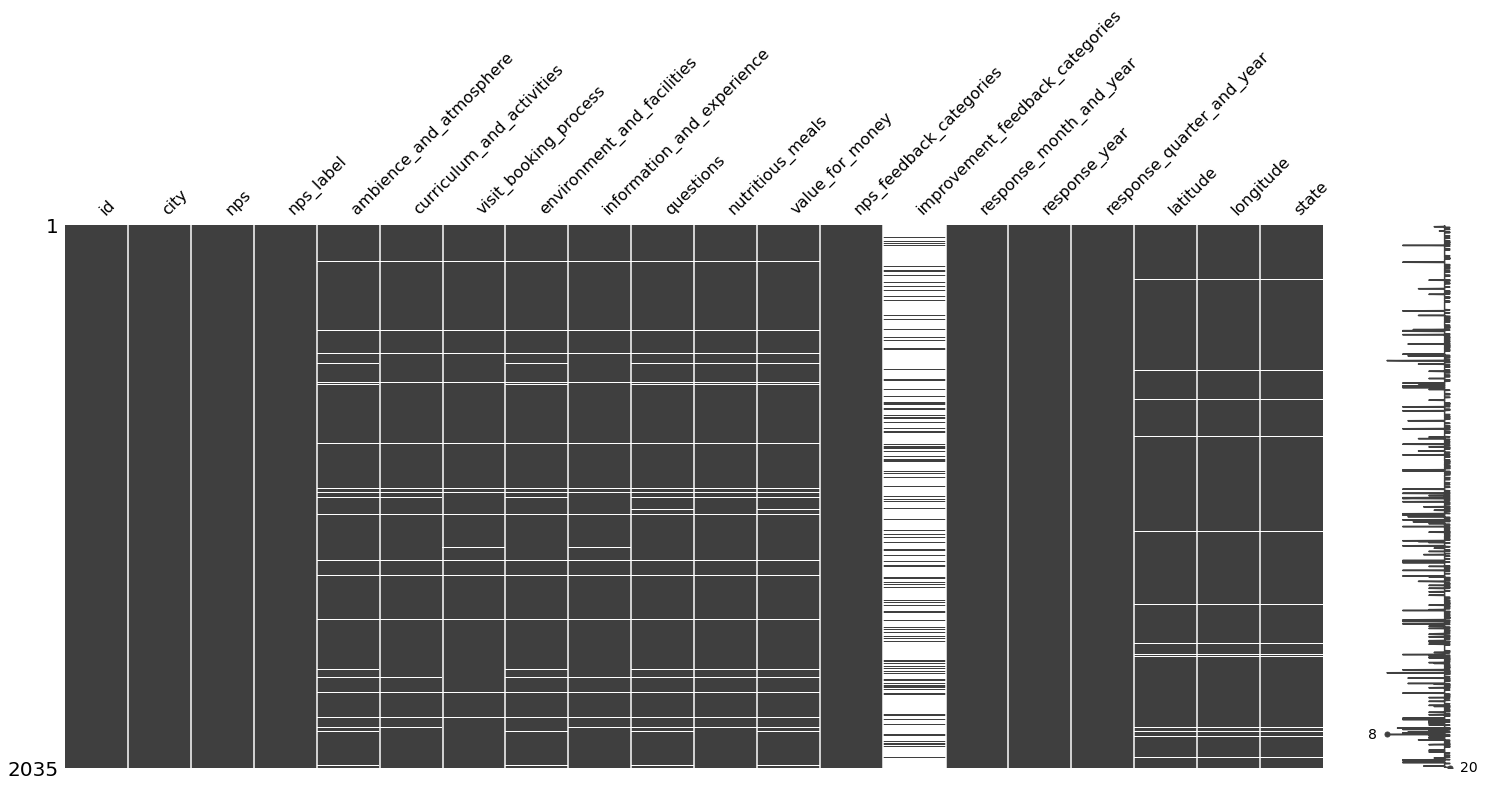

In [24]:
import missingno
missingno.matrix(new_df)
plt.show()

**Findings:**

60% of the columns (12/20) have null values. My strategy to handle them as follows:
1. Remove the entire *improvement feedback categories* column, which contains over 80% null data.
2. Replace nulls in the 8 feedback areas: *Ambience and Atmosphere, Curriculum and Activities, Visit Booking Process, Environment and Facilities, Information and Experience, Questions, Nutritious Meals, and Value For Money* to **Neutral** so that the NPS calculation will not be impacted.
3. Because the percentage of null values in: *state, longitude, and latitude* is quite small, just 3.39%. Moreover, these nulls all stay on the same row. Hence, I determined to eliminate the rows with null values in these columns.

In [25]:
#Drop column has 81.08% null
new_df1 = new_df.drop(['improvement_feedback_categories'], axis=1)

In [26]:
#List of 8 surveyed columns
nps_feedback_list = list(new_df.loc[:, ['ambience_and_atmosphere', 
                               'curriculum_and_activities', 
                               'visit_booking_process',
                               'environment_and_facilities',
                               'information_and_experience',
                               'questions',
                               'nutritious_meals',
                               'value_for_money'                              
                              ]])

In [27]:
#Convert NPS label in surveyed columns to number
for col in nps_feedback_list:
  new_df1[col] = new_df1[col].replace({'5. Strongly Agree': 5, 
                                        '4. Agree': 4,
                                        '3. Neither Agree nor Disagree':3,
                                        '2. Disagree':2,
                                        '1. Strongly Disagree':1})
  #change data type of columns from object (str) to int
  new_df1[col] = pd.to_numeric(new_df1[col])
  new_df1[col] = new_df1[col].astype('Int64')

In [28]:
#Fill NaN in 8 surveyed columns with a constant value (neutral = 4)
for col in nps_feedback_list:
  new_df1[col] = new_df1[col].fillna(4)

In [29]:
#Drop the remaining nulls in "state, longitude, and latitude" rows
#We need to drop 69 entries
new_df1 = new_df1.dropna()

In [30]:
#Reset index in dataframe after dropping 69 rows
new_df1 = new_df1.reset_index(drop=True)

In [31]:
#Double check null values in each column now
#The dataset no longer contains null values
nulls_breakdown(new_df1)

Out of 19 total columns, 0 contain null values; 0.0% columns contain null values.


In [32]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1966 non-null   int64  
 1   city                        1966 non-null   object 
 2   nps                         1966 non-null   int64  
 3   nps_label                   1966 non-null   object 
 4   ambience_and_atmosphere     1966 non-null   Int64  
 5   curriculum_and_activities   1966 non-null   Int64  
 6   visit_booking_process       1966 non-null   Int64  
 7   environment_and_facilities  1966 non-null   Int64  
 8   information_and_experience  1966 non-null   Int64  
 9   questions                   1966 non-null   Int64  
 10  nutritious_meals            1966 non-null   Int64  
 11  value_for_money             1966 non-null   Int64  
 12  nps_feedback_categories     1966 non-null   object 
 13  response_month_and_year     1966 

* After processing null value, the dataset ***new_df1*** now has 19 columns and 
1966 rows

In [34]:
#Save new_df1 dataframe to local repository for back-up
new_df1.to_csv('Imaginary_final_dataset.csv')
from google.colab import files
files.download("Imaginary_final_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##2.6 Checking outliers

In [33]:
numeric_cols = list(new_df1.loc[:, ['nps',
                                'ambience_and_atmosphere', 
                               'curriculum_and_activities', 
                               'visit_booking_process',
                               'environment_and_facilities',
                               'information_and_experience',
                               'questions',
                               'nutritious_meals',
                               'value_for_money'                              
                              ]])

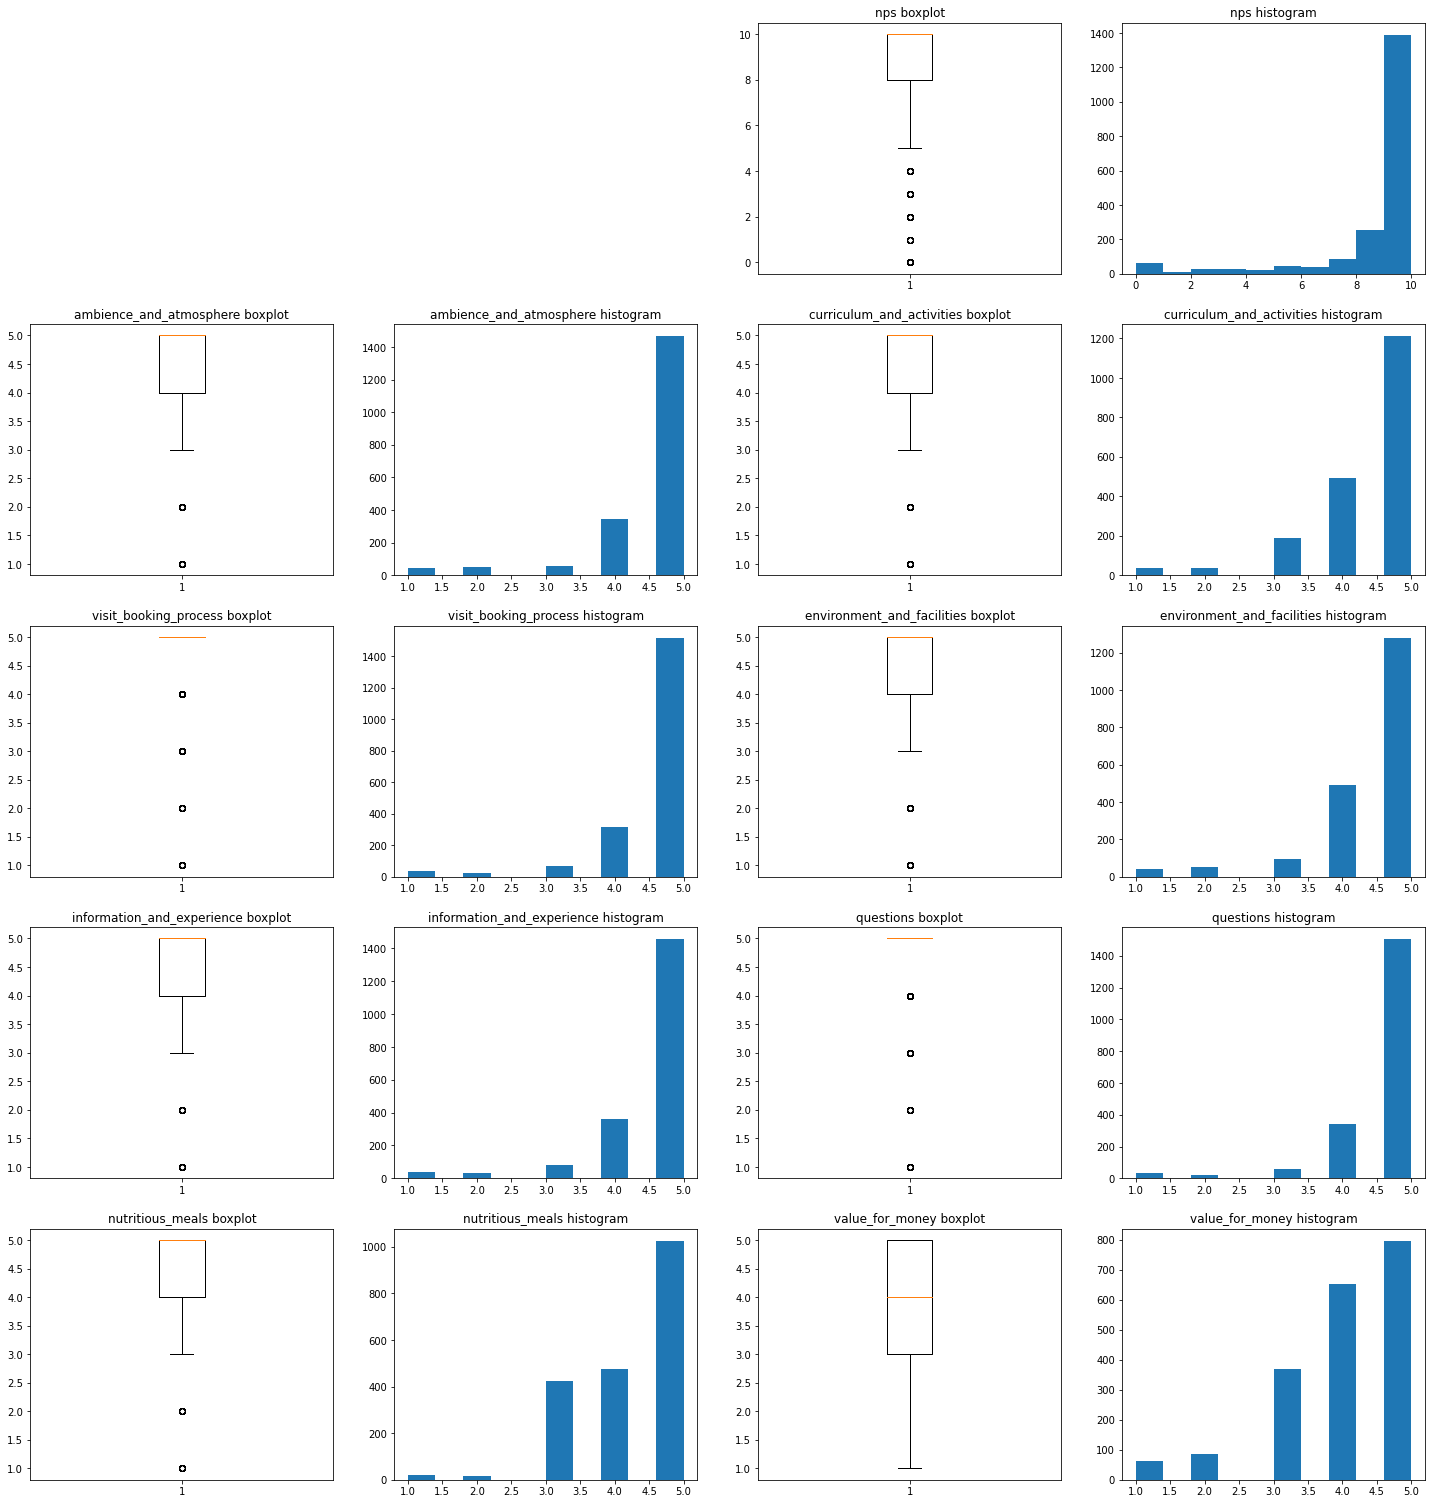

In [34]:
def outliers_visual(data):
    plt.figure(figsize=(25, 110))
    i = 0
    for col in numeric_cols:
        i += 1
        plt.subplot(20, 4, i+2)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(20, 4, i+2)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(new_df1)

**Findings:**
- The 08 surveyed categories and the NPS by location columns all have outliers and an unequal distribution of statistic. 
- The rightward skew of the data indicates that the number of Promoters outweighs that of Detractors and Neutrals in the survey results.
- Outliers can influence the accuracy when calculating NPS, so they will be preserved.

##Conclusion

After completing data preprocessing, the Imaginary NPS survey results dataset offers several findings that can be summarized up as follows.
- The survey was conducted from October 2021 to May 2022, lasting eight months (It corresponds to Q4 2021 and Q1, Q2 2022).
- 2,035 participants replied to the Imaginary Childcare NPS survey; however, only 1,966 responses qualify for use.
- Survey respondents reside in 08 Australian States and Territories, with the highest response rate came from New South Wales and the lowest from the ACT.
- "*Ambience and Atmosphere, Curriculum and Activities, Visit Booking Process, Environment and Facilities, Information and Experience, Questions, Nutritious Meals, and Value For Money*" are the 08 primary survey areas.
-  The majority of responders had a bias for Promoters. This amount outnumbers the number of Detractor and Neutrals.

#3.0 EDA

##In Overall: Parents are Happy!

In [35]:
# Experience rating from parents - Rages from 0 - 10
nps_score = df_childcare.nps.value_counts()
nps_score = nps_score.to_frame().reset_index()
nps_score = nps_score.rename(columns= {'index': 'nps', 'nps': 'number of people voted'})
nps_score

nps  number of people voted
0    10                    1134
1     9                     309
2     8                     257
3     7                      90
4     0                      65
5     5                      48
6     6                      41
7     3                      30
8     2                      27
9     4                      25
10    1                       9

Text(0.5, 1.0, 'Distribution Of Individual NPS Scores Received From Survey')

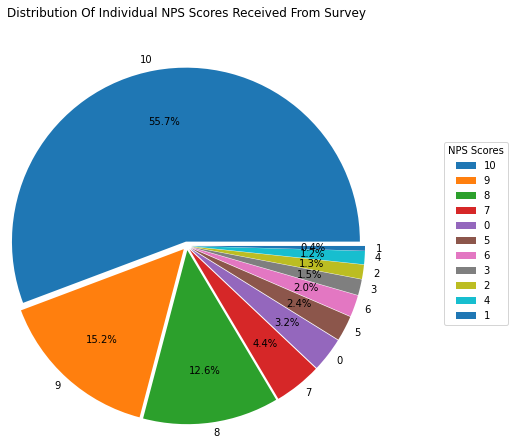

In [36]:
labels=nps_score['nps']
values =  nps_score['number of people voted']
explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05,0.05)
pie = plt.pie(values, 
              labels=labels,
              explode=explode,
              autopct='%1.1f%%', 
              pctdistance = 0.7, 
              labeldistance = 1.06,
              radius = 2)
plt.legend(pie[0], labels, loc="upper right", bbox_to_anchor = (2,1), title='NPS Scores')
plt.title('Distribution Of Individual NPS Scores Received From Survey', pad=120)

In [37]:
nps_count1 = df_childcare.nps_label.value_counts()
nps_count1 = nps_count1.to_frame().reset_index()
nps_count1 = nps_count1.rename(columns= {'index': 'nps_label', 'nps_label': 'number of people voted'})
nps_count1

nps_label  number of people voted
0   Promoter                    1443
1    Neutral                     347
2  Detractor                     245

Text(0.5, 1.0, 'Distribution Of NPS Labels Received From Survey')

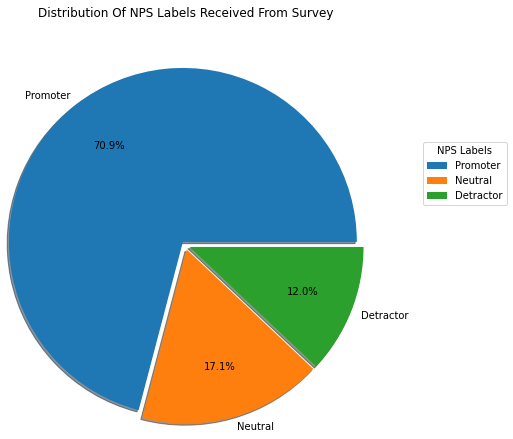

In [38]:
labels=nps_count1['nps_label']
values =  nps_count1['number of people voted']
explode = (0.05, 0.05, 0.05)
pie = plt.pie(values, 
              labels=labels, 
              explode=explode, 
              shadow=True, 
              autopct='%1.1f%%', 
              pctdistance = 0.7, 
              labeldistance = 1.06,
              radius = 2)
plt.legend(pie[0], labels, loc="upper right", bbox_to_anchor = (2,1), title='NPS Labels')
plt.title('Distribution Of NPS Labels Received From Survey', pad=120)

**Findings:**
- Parents' satisfaction with Imaginary Childcare's services was quite high throughout the post-COVID-19 period (from October 2021 to May 2022), as seen by the two pie charts above. More than 70% of survey respondents are Promoters, and 55.7% indicated they were extremely satisfied with Imaginary Childcare (rated 10 point). 
- This satisfaction comes in part from the government's financial assistance to families through the[ Child Care Subsidy](https://www.servicesaustralia.gov.au/child-care-subsidy) and [COVID Child Care Support packages](https://www.education.gov.au/covid-19/announcements/covid-19-update-australian-government-support-child-care). Moreover, state governments have a multitude of programs to develop qualified staffs in the Early Childhood Education field. These efforts have contributed to an improvement in the quality of Imaginary Childcare and other childcare providers.

##PART A: Geographic Analysis



###Q1: Which state had the highest number of respondents to the NPS survey? 

In [39]:
#Count nps label by state
df_state = new_df1.groupby(['state','nps_label'])['id'].count()
df_state = df_state.unstack()
#Total of response by label
df_state['Total'] = df_state.sum(axis = 1, skipna = True)
df_state = df_state.reset_index()
df_state['Detractor'] = df_state['Detractor'].fillna(0)
#Calculate nps by formula:  NPS = (Promoters - Detractors)/Total ratings * 100
df_state['nps_score'] = (df_state['Promoter']/df_state['Total'] - df_state['Detractor']/df_state['Total'])*100
#Rounding return result 
df_state['nps_score'] = df_state['nps_score'].round()
#Sort values by Promoter
df_state1 = df_state.sort_values("Promoter", inplace = True)
df_state

nps_label                         state  Detractor  Neutral  Promoter  Total  \
0          Australian Capital Territory        0.0      2.0       7.0    9.0   
2                    Northern Territory        3.0      3.0      22.0   28.0   
5                              Tasmania        8.0     21.0      42.0   71.0   
4                       South Australia       19.0     17.0     106.0  142.0   
7                     Western Australia       18.0     27.0     137.0  182.0   
3                            Queensland       67.0     74.0     308.0  449.0   
6                              Victoria       37.0     89.0     319.0  445.0   
1                       New South Wales       84.0    106.0     450.0  640.0   

nps_label  nps_score  
0               78.0  
2               68.0  
5               48.0  
4               61.0  
7               65.0  
3               54.0  
6               63.0  
1               57.0

In [40]:
#Change index of data frame to 'state' column
df_state1 = df_state.set_index('state')
df_state1

nps_label                     Detractor  Neutral  Promoter  Total  nps_score
state                                                                       
Australian Capital Territory        0.0      2.0       7.0    9.0       78.0
Northern Territory                  3.0      3.0      22.0   28.0       68.0
Tasmania                            8.0     21.0      42.0   71.0       48.0
South Australia                    19.0     17.0     106.0  142.0       61.0
Western Australia                  18.0     27.0     137.0  182.0       65.0
Queensland                         67.0     74.0     308.0  449.0       54.0
Victoria                           37.0     89.0     319.0  445.0       63.0
New South Wales                    84.0    106.0     450.0  640.0       57.0

Text(0.5, 1.0, 'Number of Promoters - Neutrals - Detractors by State')

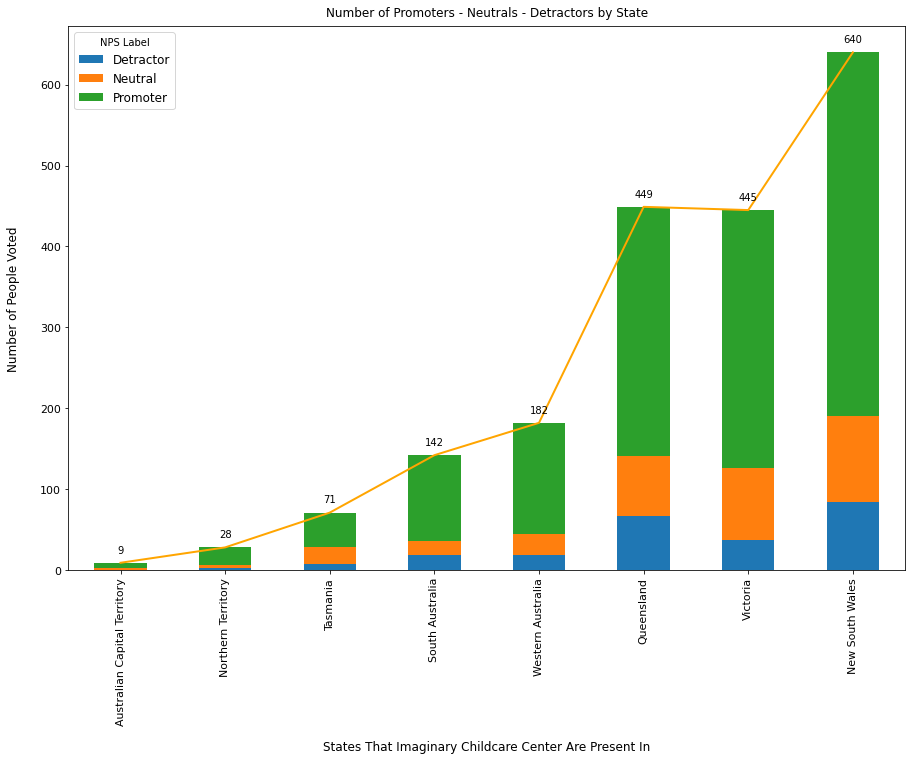

In [41]:
ax = df_state1[["Detractor", "Neutral", "Promoter"]].plot(kind="bar", stacked = True, figsize = (15,10), fontsize=11)
plt.plot(df_state1.index, df_state1['Total'],color = 'orange',linewidth=2.0)
plt.xlabel('States That Imaginary Childcare Center Are Present In', fontsize=12, labelpad=15)
plt.ylabel('Number of People Voted', fontsize=12, labelpad=20)
ax.bar_label(ax.containers[2],label_type='edge', padding=8)
plt.legend(title='NPS Label', fontsize=12)
plt.title('Number of Promoters - Neutrals - Detractors by State', pad=10)

**Findings:**
- In general, with 640 respondents, NSW had the highest proportion of parents participating in the survey, accounting for more than 32%. Queensland and Victoria follow with nearly equivalent numbers of responses (449 and 445, respectively).

According to [HESTA's Early Childhood Education and Care (ECEC) workforce insights in 2021](https://www.hesta.com.au/ececreport21), these are 03 states contain the majority ECEC providers in the country, ranging from large providers (who operate more than 25 services) to single service providers. As a result, the 03 most important regions impacting Imaginary Childcare's business strategy are New South Wales, Victoria, and Queensland.

- In terms of Detractors rate, Queensland has the greatest proportion of Detractors among respondents with 14.2% (67 out of 449 respondents were Detractors), while NSW had 13.1% (84 Detractors out of 640 respondents) and the Northern Territory had 10.7% (3 Detractors out of 28 respondents). 

The gap in satisfaction with Imaginary services between states can be explained by differences in human resource allocation as well as states government investment for the ECEC industry. New South Wales and Victoria attract the biggest number of ECEC professionals in Australia, including: Early Childhood Educators, Administration/Management, Family Day Care Workers, Kindergarten Teachers, Out of School Hours Care Workers, etc (HESTA 2021). For example, from June 2022, Victoria's TAFE system is helping to deliver the workforce for this industry by [offering tuition fee-free](https://www.premier.vic.gov.au/free-tafe-building-careers-early-childhood-education) training for Certificate III in Early Childhood Education and Care, while New South Wales commits $24.7 million over 04 years, starting from 10/2022, to [The Childcare and Economic Opportunity Fund](https://education.nsw.gov.au/early-childhood-education/early-years-commitment/affordable-childcare-fund#Boosting0) to increase access to and affordability of ECEC services.

- Tasmania is the state with the biggest neutral rate, with nearly 30% of survey respondents expressing neutral opinion (21 out of 42). On the other hand, the Detractors rate in this state is currently quite high; therefore, if Imaginary Centers intend to increase their NPS Score in this region, they must devise a strategy to convert these Neutral people to Promoters as soon as possible, before they become Detractors.

###Q2: How children and parents' satisfaction vary by states and cities? 

####In terms of State

Text(0.5, 1.0, 'NPS Score Comparison By State')

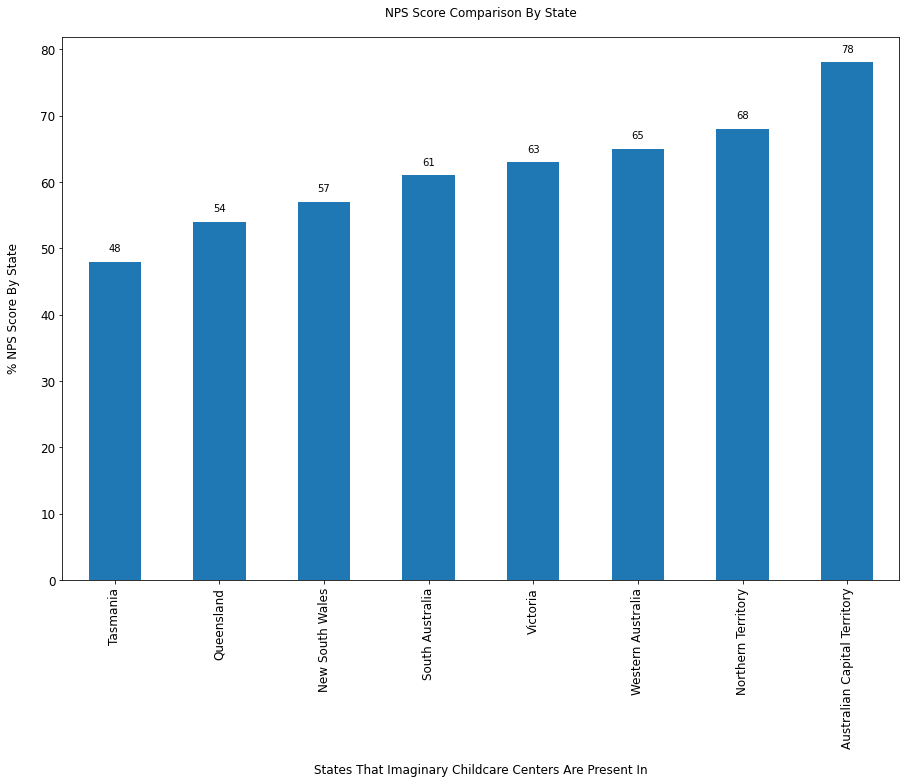

In [42]:
df_state2 = df_state.sort_values("nps_score", inplace = True)
df_state2 = df_state.set_index('state')
ax = df_state2["nps_score"].plot(kind="bar", stacked = True, figsize = (15,10), fontsize=12)
plt.xlabel('States That Imaginary Childcare Centers Are Present In', fontsize=12, labelpad=15)
plt.ylabel('% NPS Score By State', fontsize=12, labelpad=20)
ax.bar_label(ax.containers[0],label_type='edge', padding=8)
plt.title('NPS Score Comparison By State', pad=20, fontsize=12)

**Findings:**
- The ACT has the highest NPS score of 78%, followed by the Northern Territory (NT) with a score of 68%. Due to the limited number of survey respondents in these two states (only 9 and 23 people respectively), it is not possible to conclude that the quality of Imaginary Childcare in the ACT and Northern Territory is better to that of other states.

- Tasmania has the lowest NPS score due to the significant number of detractors, as analysed above. In addition, the 03 primary regions of Imaginary Childcare's business: Queensland, New South Wales, and Victoria need strategies to raise the number of Promoters and decrease the number of Detractors.

####In terms of City

In [43]:
#Reference: https://python.plainenglish.io/using-folium-to-map-latitude-and-longitude-491f8dcc81ad
import folium
from folium.plugins import MarkerCluster
m = folium.Map(location = [-33.8, 151.2], tiles = 'OpenStreetMap',zoom_start=6) #Sydney's coordinates
markerCluster = MarkerCluster().add_to(m)

for index, row in new_df1.iterrows(): 
  # html to be displayed in the popup 
    html="""
    <strong> City: </strong>""" + str(row['city'])+ \
    """</br><strong>State: </strong>""" + str(row['state'])+\
    """</br><strong>NPS Score: </strong>""" + str(row['nps']) 
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=200, height=70)
    popup = folium.Popup(iframe)

    folium.Marker(
          location=[row['latitude'], row['longitude']],
          popup= popup,
          icon = folium.Icon(color='blue', icon='fire'),
       ).add_to(markerCluster)
m.save("NPS_city.html")
m

**Findings:**
- The Choropleth Maps above depicts the cities where Imaginary Childcare's customers reside. It highlights an intriguing fact is that even if the parents live in the same area and utilise the same service, their experiences and ratings are vastly different.

- For instance, five customers from Queenstown, Tasmania send their children to a Imaginary Childcare Center in this city. However, only 2 of 5 would strongly recommend Imaginary services, 1 customer gave a neutral rating of 8 points, 1 customer gave negative feedback of 6 points, and 1 customer was extremely unsatisfied with the service and gave a rating of 2 points.

To understanding why their rating differ despite having the same geographic background, additional demographic research is potentially required.



##**PART B: Behavioral Analysis**

### Q3: How customer feedback varied throughout the course of eight months, from 10/2021 to 05/2022

In [44]:
df_time = new_df1.groupby(['response_month_and_year','nps_label'])['id'].count()
df_time = df_time.unstack()
#Total of response by label
df_time['Total'] = df_time.sum(axis = 1, skipna = True)
df_time = df_time.reset_index()
df_time['Detractor'] = df_time['Detractor'].fillna(0)
#Calculate nps by formula:  NPS = (Promoters - Detractors)/Total ratings * 100
df_time['nps_score'] = (df_time['Promoter']/df_time['Total'] - df_time['Detractor']/df_time['Total'])*100
#Rounded return result 
df_time['nps_score'] = df_time['nps_score'].round()

df_time1 = df_time.set_index('response_month_and_year')
df_time1

nps_label                Detractor  Neutral  Promoter  Total  nps_score
response_month_and_year                                                
2021-10                         23       28       125    176       58.0
2021-11                         33       41       176    250       57.0
2021-12                         29       38       122    189       49.0
2022-01                         20       38       145    203       62.0
2022-02                         40       58       241    339       59.0
2022-03                         43       63       247    353       58.0
2022-04                         27       43       207    277       65.0
2022-05                         21       30       128    179       60.0

In [45]:
df_time1 = df_time.drop(columns = ['Detractor','Neutral','Promoter','Total'])
df_time1

nps_label response_month_and_year  nps_score
0                         2021-10       58.0
1                         2021-11       57.0
2                         2021-12       49.0
3                         2022-01       62.0
4                         2022-02       59.0
5                         2022-03       58.0
6                         2022-04       65.0
7                         2022-05       60.0

In [46]:
import plotly.express as px
fig2 = px.line(df_time1, 
               x=df_time1['response_month_and_year'], 
               y = df_time1['nps_score'], 
               template = 'plotly_white', 
               title = 'Parents feedback from 10/2021 - 05/2022')
fig2.update_layout(showlegend = False)
fig2.update_traces(line = {'color':'#871e71'})
fig2.update_yaxes(title = '% NPS Score')
fig2.update_xaxes(title = 'Timeframe')
fig2.show()

In [49]:
df_time2 = df_time1
df_time2['response_month_and_year']=pd.to_datetime(df_time2['response_month_and_year'])

In [50]:
df_time2.set_index('response_month_and_year',drop=True, inplace=True)

In [51]:
df_time2=df_time2.resample('M').mean()

In [52]:
df_time2.index

DatetimeIndex(['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31'],
              dtype='datetime64[ns]', name='response_month_and_year', freq='M')

In [53]:
!pip install gif
import gif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4818 sha256=49302f36464756eaa8d54a224107af2cab13aabca9c8af452747a508756cd871
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif


In [60]:
plt.style.use('fivethirtyeight')
#Defining the start and end dates
END=df_time2.index[-1]
START=df_time2.index[0]

@gif.frame
def plot(df_time2,date):
    
    df_time2=df_time2.loc[df_time2.index[0]:pd.Timestamp(date)]
    fig, (ax1) = plt.subplots(1,figsize=(20,10),dpi=100)
    ax1.plot(df_time2['nps_score'],marker='o', linestyle='--', linewidth=6,markersize=15, color='tab:pink')
    maxi=round(df_time2['nps_score'].max()+5)
    ax1.set_title('Parents feedback from 10/2021 - 05/2022',fontsize=30)
    ax1.set_xlim([START, END])
    ax1.set_ylim([0, maxi])
    ax1.set_ylabel('% NPS Score',color = 'tab:blue',fontsize=25)

In [61]:
frames = []
for date in pd.date_range(START, END,freq = '1M'):
    date = pd.to_datetime(date)
    frame = plot(df_time2,date)
    frames.append(frame)

In [62]:
#saving the GIF
gif.save(frames, "output1.gif", duration=1 ,unit = 's')

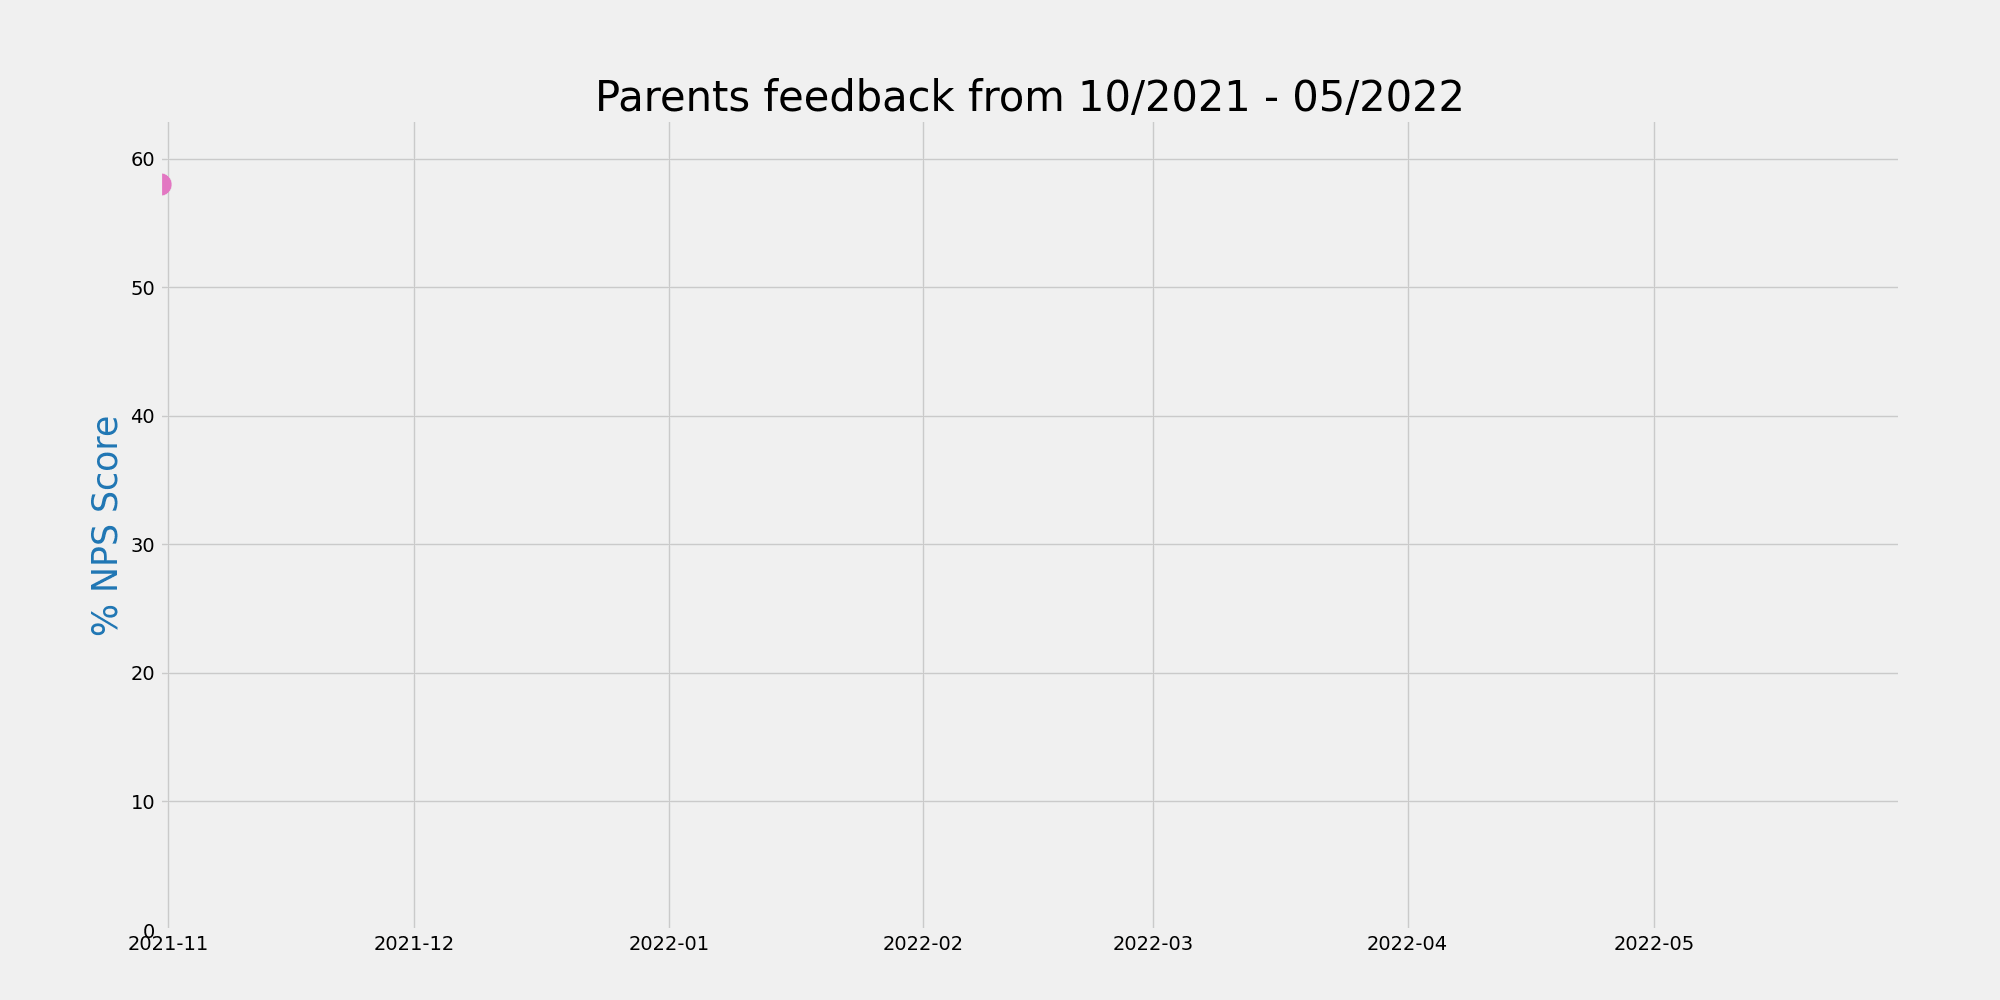

In [64]:
from IPython.display import Image
Image(open('output1.gif','rb').read())

**Findings:**
- We can divide the Imaginary feeback time into two distinct evaluation periods. The first phase of the study covers **the post Pandemic period from October 2021 to December 2021**. The second phase comprises **the new normal period from January to May 2022**.


> **(1) In the post COVID-19 period (10/2021 - 12/2021):** 

Imaginary Childcare's NPS has decreased from 58% in October 2021 to 49% in December 2021. This is due to the fact that after October 2021, numerous Australian States have officially lifted their COVID-19 lockdowns, including New South Wales on 11 October 2021 and Victoria on 21 October 2021. As more parents returned to work, the number of children enrolled in childcare grew, the workforce is experiencing a serious shortage after COVID-19. The overload at many centres has a negative impact on service quality, which in turn affects the experience and satisfaction of parents.


> **(2) In the new normal period (01/2022 - 05/2022):** 

In the first half of 2022, Imaginary Childcare's NPS Score increased significantly compared to the period in 2021. This is due to the fact that the Australian government has decided to [reopen its borders](https://www.bbc.com/news/world-australia-60284491) to international travel in February 2022, allowing many ECEC professionals who are foreigners to return to Australia and continue working. In addition, the government maintains the [Child Care Subsidy](https://www.servicesaustralia.gov.au/child-care-subsidy) and continues to extend the [Childcare Support package](https://www.education.gov.au/covid-19/announcements/covid-19-update-australian-government-support-child-care) for COVID-19 until June 30, 2022. As a result, the human resource crisis and financial concerns in the ECEC industry have been partially resolved, which has contributed to an improvement in service quality at the facilities. 

Consequently, the level of parents satisfaction increases.





###Q4: Which category has the highest and lowest NPS score among the 8 surveyed categories?

In [65]:
#Convert number to NPS label
for col in nps_feedback_list:
  new_df1[col] = new_df1[col].replace({5: "Promoter", 
                                        4: "Neutral",
                                        3: "Detractor",
                                        2: "Detractor",
                                        1: "Detractor"})

In [66]:
#Create data frame including categories only
df_category = new_df1[['ambience_and_atmosphere', 
                              'curriculum_and_activities', 
                               'visit_booking_process',
                               'environment_and_facilities',
                               'information_and_experience',
                               'questions',
                               'nutritious_meals',
                               'value_for_money']]

In [67]:
df_category

ambience_and_atmosphere curriculum_and_activities visit_booking_process  \
0                   Promoter                  Promoter              Promoter   
1                   Promoter                  Promoter              Promoter   
2                   Promoter                  Promoter              Promoter   
3                   Promoter                  Promoter              Promoter   
4                   Promoter                  Promoter              Promoter   
...                      ...                       ...                   ...   
1961               Detractor                 Detractor             Detractor   
1962                Promoter                   Neutral             Detractor   
1963                Promoter                   Neutral              Promoter   
1964                Promoter                  Promoter              Promoter   
1965                Promoter                 Detractor              Promoter   

     environment_and_facilities information_and_experience  questions  \
0                      Promoter                   Promoter   Promoter   
1                      Promoter                   Promoter   Promoter   
2                      Promoter                   Promoter   Promoter   
3                      Promoter                   Promoter   Promoter   
4                      Promoter                   Promoter   Promoter   
...                         ...                        ...        ...   
1961                    Neutral                  Detractor  Detractor   
1962                    Neutral                   Promoter   Promoter   
1963                   Promoter                   Promoter   Promoter   
1964                   Promoter                   Promoter   Promoter   
1965                   Promoter                   Promoter   Promoter   

     nutritious_meals value_for_money  
0            Promoter        Promoter  
1            Promoter         Neutral  
2           Detractor        Promoter  
3            Promoter         Neutral  
4           Detractor        Promoter  
...               ...             ...  
1961        Detractor       Detractor  
1962          Neutral         Neutral  
1963          Neutral        Promoter  
1964         Promoter       Detractor  
1965        Detractor        Promoter  

[1966 rows x 8 columns]

In [68]:
#Function to count number of Promoters, Neutrals and Detractors in each column
from functools import reduce
def nps_df (data):
  dfs = []
  for col in nps_feedback_list:
    df = data[col].value_counts()
    df = df.to_frame().reset_index()
    df = df.rename(columns= {'index': 'nps'})
    dfs.append(df)
  df_nps_cat = reduce(lambda left,right: pd.merge(left,right,on='nps'), dfs)
  return (df_nps_cat)
df_nps_cat1 = nps_df(df_category)
df_nps_cat1

nps  ambience_and_atmosphere  curriculum_and_activities  \
0   Promoter                     1467                       1212   
1    Neutral                      347                        494   
2  Detractor                      152                        260   

   visit_booking_process  environment_and_facilities  \
0                   1519                        1282   
1                    317                         493   
2                    130                         191   

   information_and_experience  questions  nutritious_meals  value_for_money  
0                        1457       1506              1027              797  
1                         359        344               477              652  
2                         150        116               462              517

In [69]:
df_nps_cat2 = df_nps_cat1.set_index('nps').T.rename_axis('category')
df_nps_cat2['Total'] = df_nps_cat2.sum(axis = 1)
#Calculate nps by formula:  NPS = (Promoters - Detractors)/Total ratings * 100
df_nps_cat2['nps_score'] = (df_nps_cat2['Promoter']/df_nps_cat2['Total'] - df_nps_cat2['Detractor']/df_nps_cat2['Total'])*100
df_nps_cat2['nps_score'] = df_nps_cat2['nps_score'].round()
df_nps_cat2 = df_nps_cat2.reset_index()
df_nps_cat3 = df_nps_cat2.sort_values("Promoter", inplace = True)
df_nps_cat3 = df_nps_cat2.set_index('category')
df_nps_cat3

nps                         Promoter  Neutral  Detractor  Total  nps_score
category                                                                  
value_for_money                  797      652        517   1966       14.0
nutritious_meals                1027      477        462   1966       29.0
curriculum_and_activities       1212      494        260   1966       48.0
environment_and_facilities      1282      493        191   1966       55.0
information_and_experience      1457      359        150   1966       66.0
ambience_and_atmosphere         1467      347        152   1966       67.0
questions                       1506      344        116   1966       71.0
visit_booking_process           1519      317        130   1966       71.0

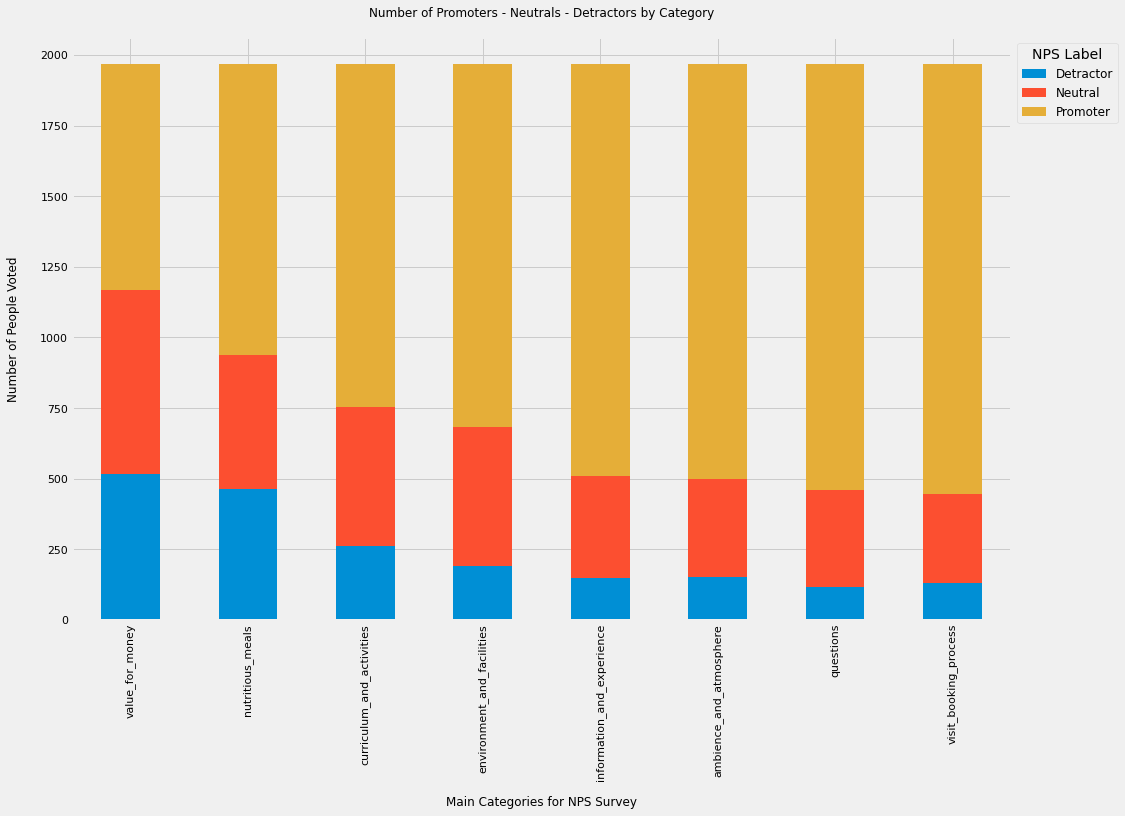

In [70]:
#Stack bar chart illustrate the comparision of Promoters, Neutrals, Detractors among 8 columns
ax = df_nps_cat3[["Detractor", "Neutral", "Promoter"]].plot(kind="bar", stacked = True, figsize = (15,10), fontsize=11)
plt.xlabel('Main Categories for NPS Survey', fontsize=12, labelpad=15)
plt.ylabel('Number of People Voted', fontsize=12, labelpad=20)
plt.title('Number of Promoters - Neutrals - Detractors by Category', pad=20, fontsize=12)
plt.legend(bbox_to_anchor = (1,1), title='NPS Label', fontsize=12)

Text(0.5, 1.0, 'NPS Score Comparison By Category')

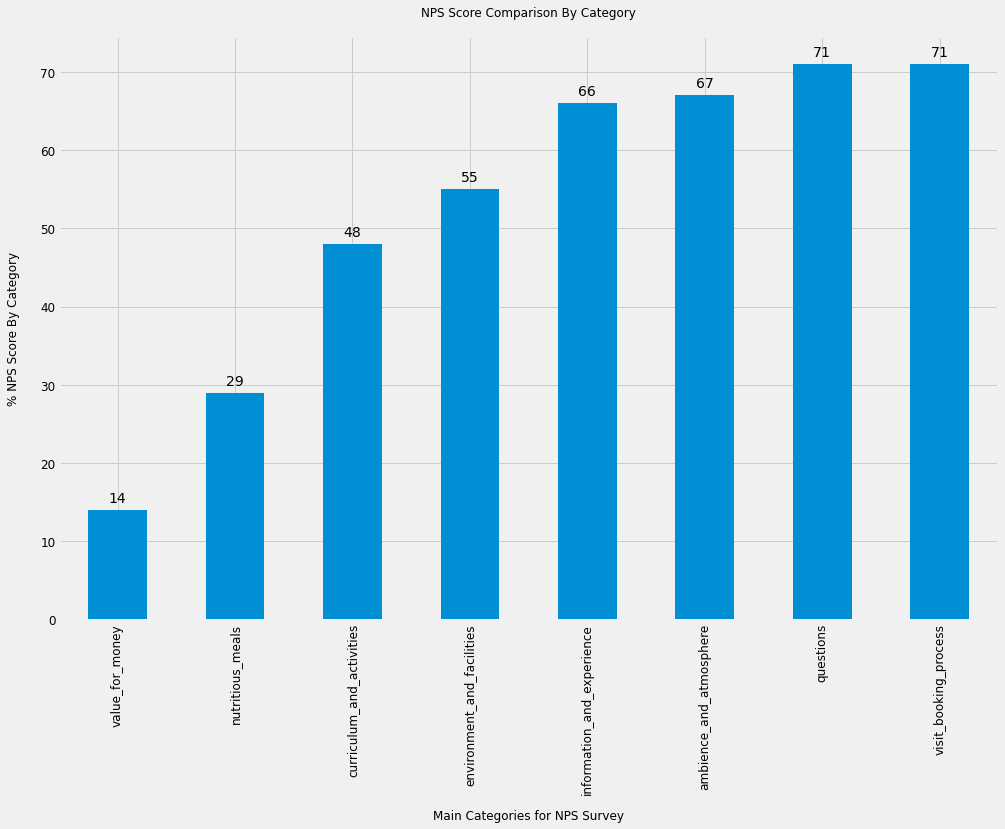

In [71]:
df_nps_cat4 = df_nps_cat2.sort_values("nps_score", inplace = True)
df_nps_cat4 = df_nps_cat2.set_index('category')
ax = df_nps_cat3["nps_score"].plot(kind="bar", stacked = True, figsize = (15,10), fontsize=12)
plt.xlabel('Main Categories for NPS Survey', fontsize=12, labelpad=15)
plt.ylabel('% NPS Score By Category', fontsize=12, labelpad=20)
ax.bar_label(ax.containers[0], label_type='edge', padding=5)
plt.title('NPS Score Comparison By Category', pad=20, fontsize=12)

**Findings:**
- The categories with the highest NPS Score are "Visit Booking Process" and "Question". These are the two services with the highest Promoters, 1519 and 1506, and the lowest Detractors, 130 and 116, respectively. This demonstrates that Imaginary has been efficient in terms of administration and customer support.
- The categories with the poorest NPS scores are "Value for money" and "Nutritious Meal". This indicates that parents' primary concern while enrolling their children to Imaginary Childcare centres is the Tuition Fee and the Children's Nutrition.

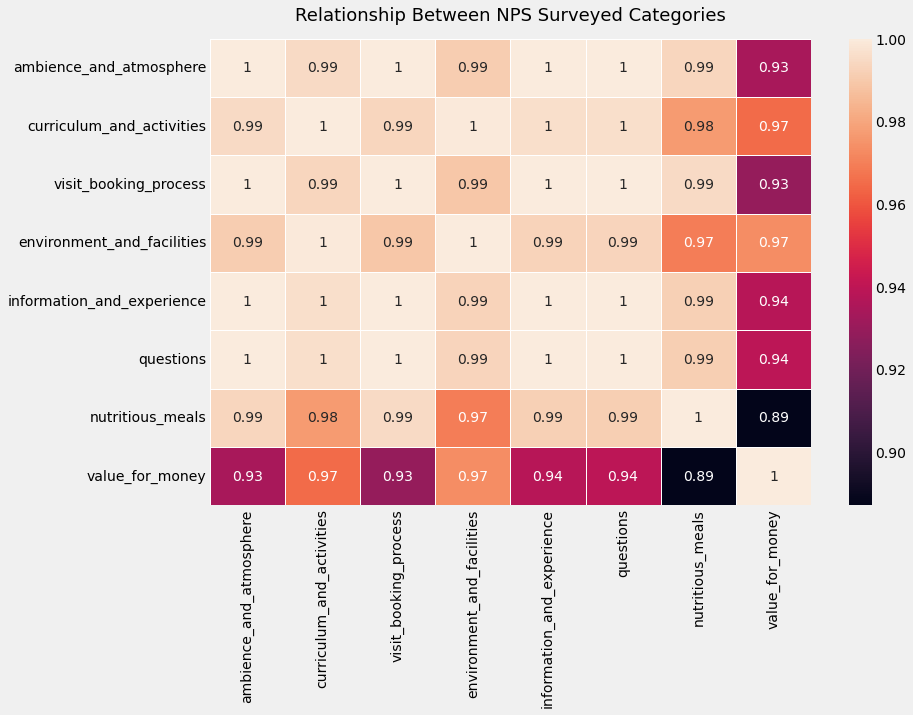

In [72]:
corr = df_nps_cat1.corr()
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(corr, annot = True, linewidths = 0.5, ax = ax)
plt.title('Relationship Between NPS Surveyed Categories', fontsize=18, pad=18)
plt.show()

**Findings:**
- The heatmap depicts the relationship between categories. It can be seen that **"Value for Money"** has a positive relationship with factors such as **"Nutritious Meal"** (0,89), **"Ambience and Atmosphere"** (0,93), and **"Visit Booking Process"** (0,93), however the relationship is not very strong. 

This demonstrates that while parents may believe that the amount of money they spend for the center's services is increasing, but the nutrition in the food, the cleanliness of the facility, and the booking service are not providing appropriate value for the money invested.